# importing module

In [1]:
import pandas as pd #for data handling
import matplotlib.pyplot as plt #for plot of graph
import seaborn as sns #for drawing highly attractive and information statistical

# Loading the dataset

In [2]:
a=pd.read_csv("C:\\Users\\HP 14 CF0054\\Downloads\\IMDB Dataset.csv")

In [3]:
a

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Feature extraction

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
t=TfidfVectorizer(use_idf=True,norm="l2",smooth_idf=True)

In [6]:
x=t.fit_transform(a["review"].values)

In [7]:
x

<50000x101895 sparse matrix of type '<class 'numpy.float64'>'
	with 6826529 stored elements in Compressed Sparse Row format>

In [8]:
y=a["sentiment"]

# Train-Test split

In [9]:
from sklearn.svm import LinearSVC

In [10]:
obj= LinearSVC()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [12]:
obj.fit(x_train,y_train)

LinearSVC()

In [13]:
y_pred=obj.predict(x_test)

In [14]:
obj.score(x_test,y_test)

0.902

# Exploratory data analysis

<AxesSubplot:ylabel='sentiment'>

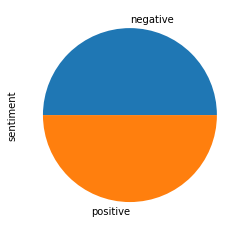

In [15]:
y.value_counts().plot.pie()

<AxesSubplot:>

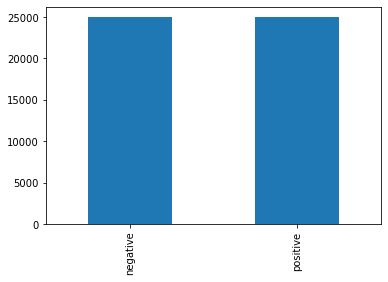

In [16]:
y.value_counts().plot.bar()

# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_pred,y_test))

[[4517  519]
 [ 461 4503]]
              precision    recall  f1-score   support

    negative       0.90      0.91      0.90      4978
    positive       0.91      0.90      0.90      5022

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [18]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4517,  519],
       [ 461, 4503]], dtype=int64)

In [19]:

print(accuracy_score(y_test,y_pred))


0.902


<AxesSubplot:>

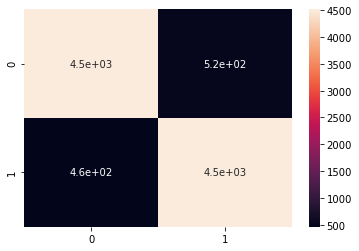

In [20]:
#import seaborn as sns
sns.heatmap(cm, annot=True)